In [1]:
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import matplotlib as mpl
import seaborn as sns
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import re
import math   
from scipy import stats
import random
import pickle

In [2]:
np.random.seed(42)
random.seed(42)

In [3]:
arm_dist_title = 'Arms Distribution={0.2, 0.8}'
cost = "1, in_factor=2, dec_factor=0.5"

In [38]:
df = pd.read_csv('./records_tests/test_record_1000_sim_00001_exp_100_runs_50_tree_05292022103625.csv')

In [39]:
with open('records_tests/test_record_1000_sim_00001_exp_100_runs_50_tree_05292022103625.pkl', 'rb') as f:
        d = pickle.load(f)
d

Namespace(learning_rate=1.0, discount_factor=0.95, base_query_cost=0.5, exploration_const=0.0001, max_simulations=1000, horizon=50, arms_thetas=(0.2, 0.8), runs=100, delayed_tree_expansion=50, increase_factor=1.0, decrease_factor=1.0)

## Checking query probability

<AxesSubplot:xlabel='timestep'>

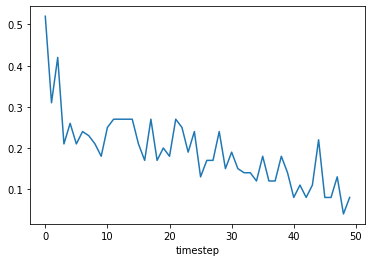

In [41]:
df.groupby(by=['timestep']).mean()['query_ind'].plot()

## Check arms convergence

In [42]:
df.groupby('run').mean()['chosen_arm'].round(0).value_counts()

1.0    81
0.0    19
Name: chosen_arm, dtype: int64

## Avg. Reward per Timestep

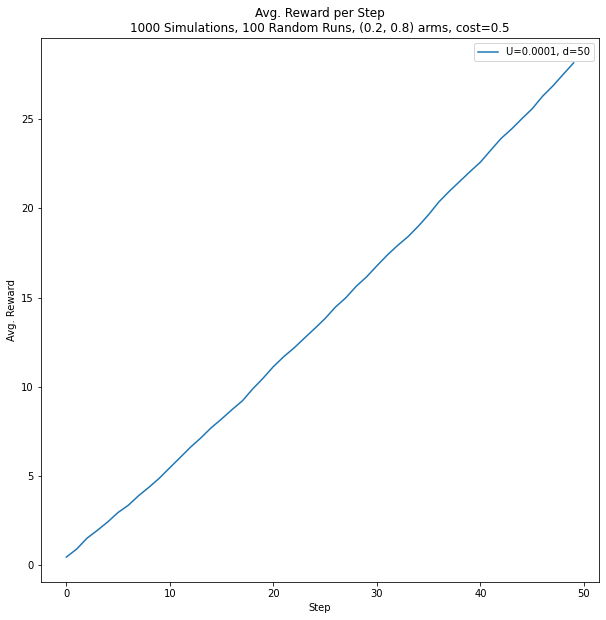

In [45]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
df.groupby(['timestep']).mean()['reward'].expanding().sum().plot(
        ax=ax, title='Avg. Reward per Step\n1000 Simulations, 100 Random Runs, (0.2, 0.8) arms, cost=0.5', xlabel='Step', ylabel='Avg. Reward', label='U=0.0001, d=50')

# df_fixed_cost_100_exp.groupby(['timestep']).mean()['reward'].expanding().sum().plot(ax=ax, label='U=100')

ax.legend()
plt.show()

## Avg. Regret

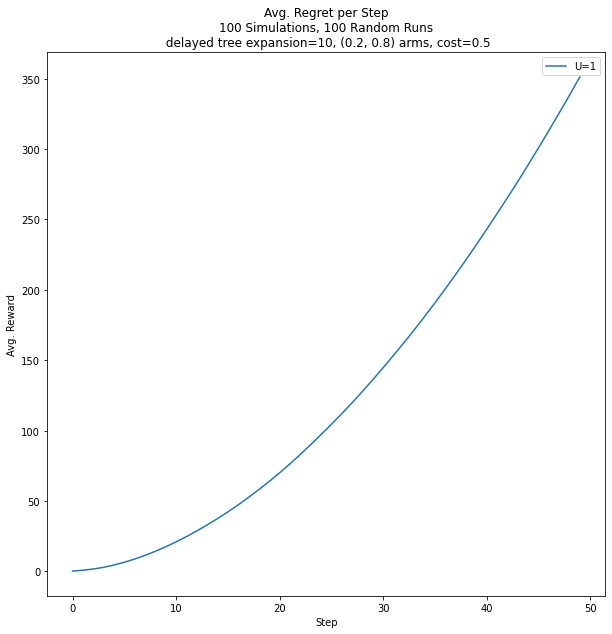

In [37]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
df.groupby(['timestep']).mean()['regret'].expanding().sum().plot(
        ax=ax, title='Avg. Regret per Step\n100 Simulations, 100 Random Runs\n delayed tree expansion=10, (0.2, 0.8) arms, cost=0.5', xlabel='Step', ylabel='Avg. Reward', label='U=1')

# df_fixed_cost_100_exp.groupby(['timestep']).mean()['regret'].expanding().sum().plot(ax=ax, label='U=100')

ax.legend()
plt.show()